# Análise de Ações (Banco do Brasil, Bradesco, Petrobras)
Este projeto coleta dados históricos das ações e calcula médias móveis de 20 e 50 dias para análise de tendência.


In [4]:
import yfinance as yf #permite acessar dados financeiros históricos e em tempo real do Yahoo Finance.
#import pandas as pd  operações como leitura e escrita de arquivos CSV, limpeza de dados, agregação e muito mais.
import matplotlib.pyplot as plt#plotagem em Python que fornece uma interface para criar gráficos e visualizações de dados.


In [5]:
# Definir os tickers das ações
tickers = ['BBAS3.SA', 'BBDC4.SA', 'PETR4.SA']

In [6]:
# Baixar dados históricos de uma ação
def get_stock_data(ticker):
    data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
    data.to_csv('dados_financeiros.csv')  # Salva os dados
    return data

In [7]:
# Coletar dados para cada ação
data = {ticker: get_stock_data(ticker) for ticker in tickers}

/tmp/ipython-input-1936526064.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1936526064.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1936526064.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


In [8]:
# Calcular médias móveis para cada ação
for ticker in tickers:
    data[ticker]['MA20'] = data[ticker]['Close'].rolling(window=20).mean()
    data[ticker]['MA50'] = data[ticker]['Close'].rolling(window=50).mean()

In [9]:
# Printa os dados na tela
for ticker in tickers:
    print(f'Dados para {ticker}:')
    print(data[ticker])

Dados para BBAS3.SA:
Price           Close       High        Low       Open    Volume       MA20  \
Ticker       BBAS3.SA   BBAS3.SA   BBAS3.SA   BBAS3.SA  BBAS3.SA              
Date                                                                          
2020-01-02  17.323465  17.378206  17.120607  17.178566  26319800        NaN   
2020-01-03  17.294485  17.358885  17.017567  17.098066  18930800        NaN   
2020-01-06  17.065866  17.194666  16.888768  17.194666  19999800        NaN   
2020-01-07  16.937067  17.075526  16.837249  17.065867  21277000        NaN   
2020-01-08  16.782511  17.062649  16.756752  16.988589  42937200        NaN   
...               ...        ...        ...        ...       ...        ...   
2022-12-23  14.273612  14.419261  13.970176  13.970176  17488800  13.771447   
2022-12-26  14.253382  14.390939  14.055138  14.390939   9105400  13.786743   
2022-12-27  13.780024  14.342391  13.715291  14.342391  17731600  13.769963   
2022-12-28  14.026818  14.07941

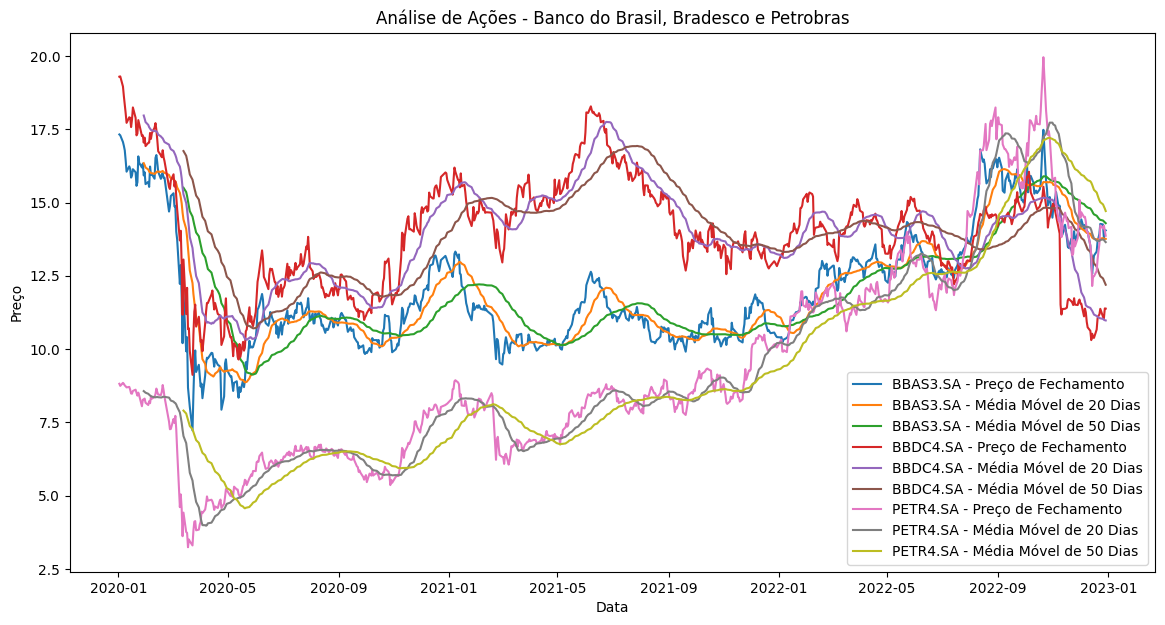

In [10]:
# Plotar os dados
plt.figure(figsize=(14, 7))

for ticker in tickers:
    plt.plot(data[ticker]['Close'], label=f'{ticker} - Preço de Fechamento')
    plt.plot(data[ticker]['MA20'], label=f'{ticker} - Média Móvel de 20 Dias')
    plt.plot(data[ticker]['MA50'], label=f'{ticker} - Média Móvel de 50 Dias')

plt.title('Análise de Ações - Banco do Brasil, Bradesco e Petrobras')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

## Interpretação dos Gráficos
- O preço de fechamento mostra a trajetória real das ações.
- A média móvel de 20 dias indica tendências de curto prazo.
- A média móvel de 50 dias indica tendências de médio prazo.
- Quando a MA20 cruza acima da MA50, pode sinalizar início de tendência de alta.
- Quando a MA20 cruza abaixo da MA50, pode sinalizar tendência de queda.
- Comparando as três ações:
  - Petrobras apresenta maior volatilidade.
  - Banco do Brasil e Bradesco mostram padrões mais estáveis.


In [12]:
import yfinance as yf  # permite acessar dados financeiros históricos e em tempo real do Yahoo Finance.
import pandas as pd  # operações com leitura e escrita de arquivos CSV
import matplotlib.pyplot as plt  # plota gráficos
from sklearn.model_selection import train_test_split  # dividir um conjunto de dados em conjuntos de treinamento e teste.
from sklearn.linear_model import LinearRegression  # implementação do modelo de regressão linear.
import numpy as np  # fornece suporte para arrays multidimensionais e matrizes
import scipy.stats as stats  # fornece uma ampla gama de funções estatísticas, incluindo distribuições de probabilidade, testes estatísticos e funções de ajuste de dados.

# Definir os tickers das ações
tickers = ['BBAS3.SA', 'BBDC4.SA', 'PETR4.SA']



In [13]:
# Função para baixar dados históricos de uma ação
def get_stock_data(ticker):
    data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
    print(f"Dados para {ticker}:\n", data.head())  # Adicionar print para verificar os dados
    return data

# Coletar dados para cada ação
data = {ticker: get_stock_data(ticker) for ticker in tickers}

/tmp/ipython-input-2609278421.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2609278421.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2609278421.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed

Dados para BBAS3.SA:
 Price           Close       High        Low       Open    Volume
Ticker       BBAS3.SA   BBAS3.SA   BBAS3.SA   BBAS3.SA  BBAS3.SA
Date                                                            
2020-01-02  17.323465  17.378206  17.120607  17.178566  26319800
2020-01-03  17.294485  17.358885  17.017567  17.098066  18930800
2020-01-06  17.065866  17.194666  16.888768  17.194666  19999800
2020-01-07  16.937067  17.075526  16.837249  17.065867  21277000
2020-01-08  16.782511  17.062649  16.756752  16.988589  42937200
Dados para BBDC4.SA:
 Price           Close       High        Low       Open    Volume
Ticker       BBDC4.SA   BBDC4.SA   BBDC4.SA   BBDC4.SA  BBDC4.SA
Date                                                            
2020-01-02  19.295868  19.295868  18.621979  18.791737  25031584
2020-01-03  19.305632  19.557824  18.981383  18.991677  39999078
2020-01-06  18.960783  19.187241  18.754911  19.146068  33675497
2020-01-07  18.631399  19.022556  18.528463  1

In [14]:
# Coletar dados para cada ação
data = {ticker: get_stock_data(ticker) for ticker in tickers}

# Salvar os dados em um arquivo CSV
for ticker in tickers:
    data[ticker].to_csv(f'dados_financeiros_{ticker}.csv')

# Calcular médias móveis para cada ação
for ticker in tickers:
    data[ticker]['MA20'] = data[ticker]['Close'].rolling(window=20).mean()
    data[ticker]['MA50'] = data[ticker]['Close'].rolling(window=50).mean()

/tmp/ipython-input-2609278421.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2609278421.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2609278421.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed

Dados para BBAS3.SA:
 Price           Close       High        Low       Open    Volume
Ticker       BBAS3.SA   BBAS3.SA   BBAS3.SA   BBAS3.SA  BBAS3.SA
Date                                                            
2020-01-02  17.323465  17.378206  17.120607  17.178566  26319800
2020-01-03  17.294485  17.358885  17.017567  17.098066  18930800
2020-01-06  17.065866  17.194666  16.888768  17.194666  19999800
2020-01-07  16.937067  17.075526  16.837249  17.065867  21277000
2020-01-08  16.782511  17.062649  16.756752  16.988589  42937200
Dados para BBDC4.SA:
 Price           Close       High        Low       Open    Volume
Ticker       BBDC4.SA   BBDC4.SA   BBDC4.SA   BBDC4.SA  BBDC4.SA
Date                                                            
2020-01-02  19.295868  19.295868  18.621979  18.791737  25031584
2020-01-03  19.305632  19.557824  18.981383  18.991677  39999078
2020-01-06  18.960783  19.187241  18.754911  19.146068  33675497
2020-01-07  18.631399  19.022556  18.528463  1

In [15]:
# Preparar os dados para previsão
for ticker in tickers:
    data[ticker]['Target'] = data[ticker]['Close'].shift(-1)
    df = data[ticker][['Close', 'MA20', 'MA50', 'Target']].dropna()
    X = df[['Close', 'MA20', 'MA50']]
    y = df['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Treinar o modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

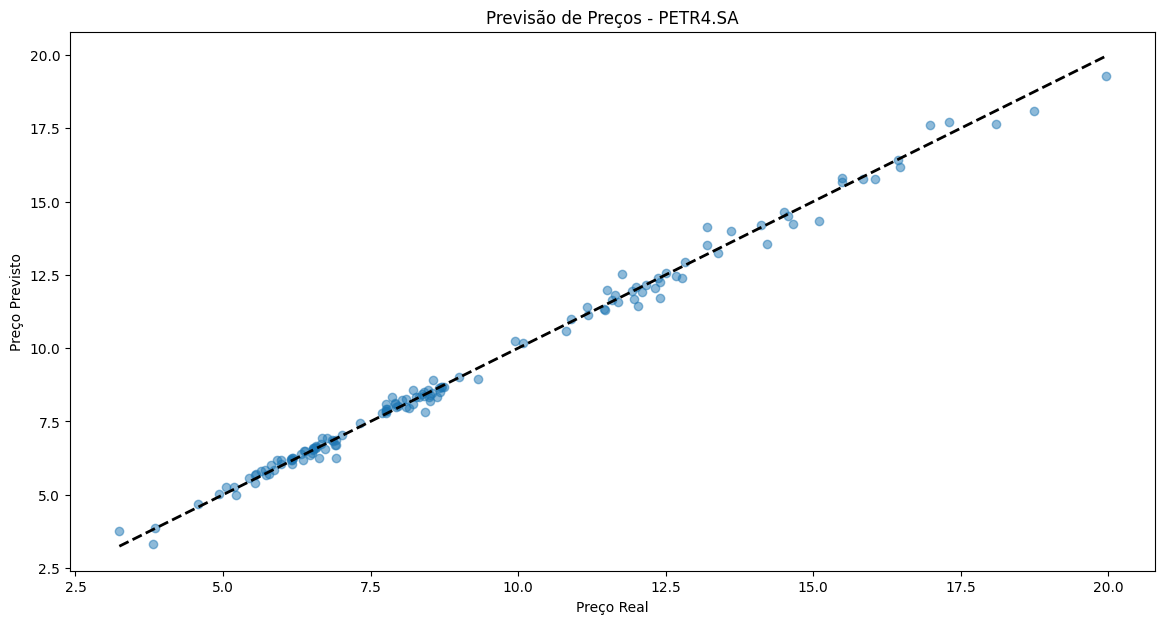

In [23]:
    # Fazer previsões
    predictions = model.predict(X_test)

    # Visualizar as previsões com gráfico de dispersão
    plt.figure(figsize=(14, 7))
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f'Previsão de Preços - {ticker}')
    plt.xlabel('Preço Real')
    plt.ylabel('Preço Previsto')
    plt.show()

    # Calcular os resíduos
    residuals = y_test - predictions




## Interpretação do Gráfico de Previsão

O gráfico compara os preços reais da ação PETR4 com os preços previstos pelo modelo.  
- A linha tracejada mostra o cenário ideal (preço previsto = preço real).  
- Os pontos azuis próximos da linha indicam que o modelo está acertando bem.  
- Observa-se uma forte correlação entre valores reais e previstos, o que sugere que o modelo tem boa capacidade de previsão.  


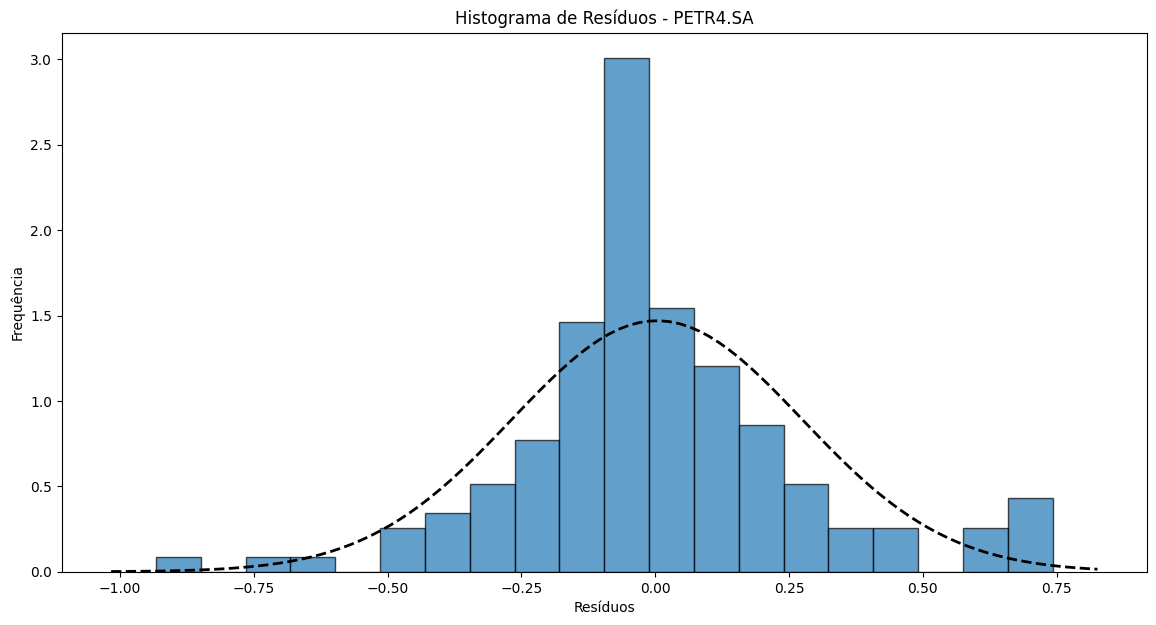

In [22]:
    #Visualizar o histograma de resíduos
    plt.figure(figsize=(14, 7))
    plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7, density=True)
    plt.title(f'Histograma de Resíduos - {ticker}')
    plt.xlabel('Resíduos')
    plt.ylabel('Frequência')

    # Adicionar a linha de distribuição normal
    mu, std = stats.norm.fit(residuals)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k--', lw=2)
    plt.show()

## Interpretação do Histograma de Resíduos

O histograma mostra a distribuição dos erros (resíduos) entre os preços reais e previstos da PETR4.  
- A maioria dos resíduos está próxima de zero, indicando boa precisão do modelo.  
- A curva tracejada representa a distribuição normal ideal.  
- Como os resíduos se aproximam dessa curva, podemos concluir que o modelo está bem ajustado.  
- Pequenas assimetrias sugerem que ainda há variações que o modelo não captura totalmente.


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
